In [49]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# !unzip cats_and_dogs.zip

In [3]:
# !tree

In [4]:
# !mkdir cats_and_dogs/test/test_images

In [5]:
# !mv cats_and_dogs/test/*.jpg cats_and_dogs/test/test_images

In [6]:
# !rm cats_and_dogs.zip

In [7]:
# Path and directory for data
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Variables for pre-processing
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
# Get data preprocessed from directories
train_image_generator = ImageDataGenerator(rescale = 1/255,
                                           rotation_range = 20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode = "reflect")

validation_image_generator = ImageDataGenerator(rescale=1/255)

test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 50,
    class_mode = None,
    shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [9]:
# Take samples from training data
training_sample_images, training_sample_labels = next(train_data_gen)

In [10]:
# Create a function to plot images and their labels
def imageplotting(images, labels):
    fig, axs = plt.subplots(len(images), 1, figsize = (7,len(images) * 3))

    for image, label, ax in zip(images, labels, axs):
        ax.imshow(image)
        ax.set_title(f"This image is a {'dog' if label == 1.0 else 'cat'}")
        ax.set_axis_off()
    plt.show()

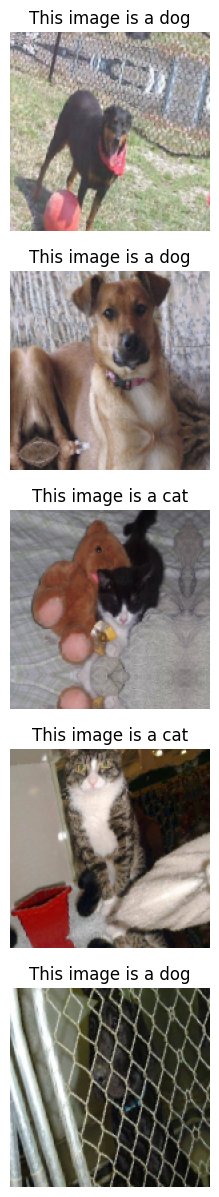

In [11]:
# Plot samples
imageplotting(training_sample_images[:5], training_sample_labels[:5])

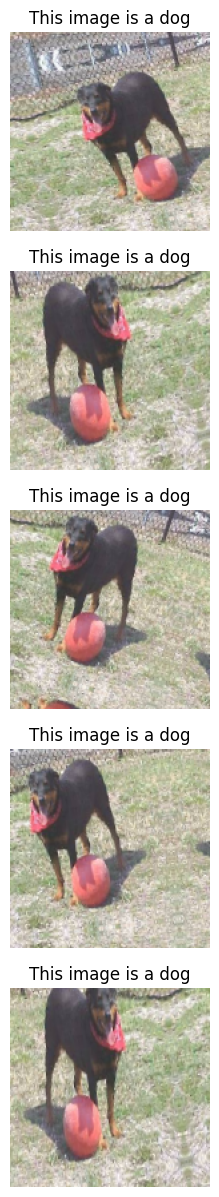

In [12]:
# See data augmentation outputs
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
augmented_images_labels = [train_data_gen[0][1][0] for i in range(5)]

imageplotting(augmented_images, augmented_images_labels)

In [58]:
# Building model 
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape = train_data_gen.image_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [59]:
# Set training variables
STEPS_PER_EPOCH = train_data_gen.n // train_data_gen.batch_size
VALIDATION_STEPS = val_data_gen.n // val_data_gen.batch_size
VALIDATION_STEPS, STEPS_PER_EPOCH

(7, 15)

In [60]:
# Create early stopping to avoid too much useless epochs
es = EarlyStopping(patience=3, restore_best_weights=True)

In [61]:
# Training model
history = model.fit(x = train_data_gen,
                    batch_size = batch_size,
                    epochs = 100,
                    validation_data = val_data_gen,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_steps = VALIDATION_STEPS,
                    callbacks = [es])

Epoch 1/100
15/15 [==============================] - 67s 4s/step - loss: 0.7009 - accuracy: 0.5187 - val_loss: 0.6959 - val_accuracy: 0.4978
Epoch 2/100
15/15 [==============================] - 71s 5s/step - loss: 0.6951 - accuracy: 0.4840 - val_loss: 0.6900 - val_accuracy: 0.5346
Epoch 3/100
15/15 [==============================] - 71s 5s/step - loss: 0.6897 - accuracy: 0.5427 - val_loss: 0.6828 - val_accuracy: 0.5145
Epoch 4/100
15/15 [==============================] - 71s 5s/step - loss: 0.6667 - accuracy: 0.5849 - val_loss: 0.6301 - val_accuracy: 0.6127
Epoch 5/100
15/15 [==============================] - 71s 5s/step - loss: 0.6485 - accuracy: 0.6138 - val_loss: 0.6061 - val_accuracy: 0.6696
Epoch 6/100
15/15 [==============================] - 69s 5s/step - loss: 0.6138 - accuracy: 0.6528 - val_loss: 0.6172 - val_accuracy: 0.6406
Epoch 7/100
15/15 [==============================] - 68s 4s/step - loss: 0.6108 - accuracy: 0.6715 - val_loss: 0.5705 - val_accuracy: 0.6875
Epoch 8/100
1

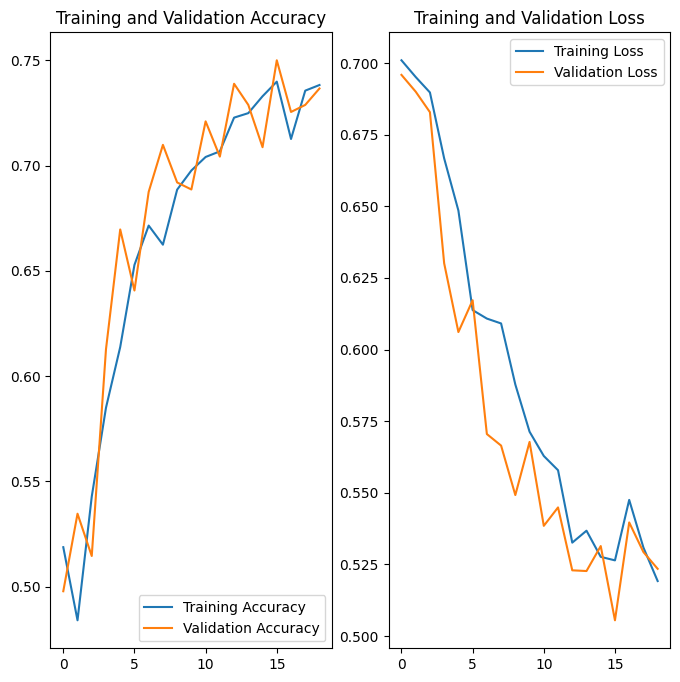

In [62]:
# Plot learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
f'Average validation accuracy is {round(np.mean(history.history["val_accuracy"]) * 100, 2)}%'

'Average validation accuracy is 67.32%'

In [64]:
f'Max validation accuracy is {round(np.max(history.history["val_accuracy"]) * 100, 2)}%'

'Max validation accuracy is 75.0%'

In [65]:
y_true = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 
          1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 
          0, 0, 0, 0]

In [66]:
# Make predictions
y_pred = model.predict(test_data_gen)

1/1 [==============================] - 1s 1s/step


In [67]:
# Function to encode predictions
def encodingpredictions(array):
    lst = array.flatten().tolist()
    labels = []
    for prediction in lst:
        if prediction >= 0.5:
            labels.append(1)
        else:
            labels.append(0)
    
    return labels

In [69]:
# Evaluate model with accuracy score
f"Accuracy score is {round(accuracy_score(y_true, encodingpredictions(y_pred)) * 100, 2)}%"

'Accuracy score is 80.0%'

In [34]:
# Get test images arrays
test_images = next(test_data_gen)

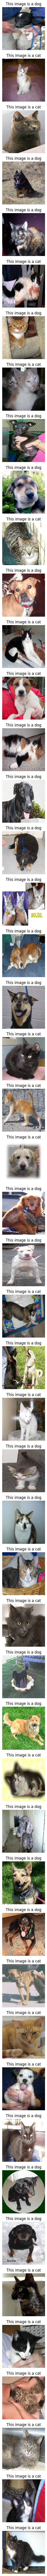

In [35]:
# Plot model's predictions
imageplotting(test_images, encodingpredictions(y_pred))